### Dawid Płudowski
# Eksploracyjna analiza danych dotyczących jadalności grzybów

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

## Wczytanie danych

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Oznaczenia

Większość zmiennych jest jakościowa, opisują kolory, kształty lub zapachy, więc nie da się na nich ustalić porządku liniowego.
Te, które można by opsiać numerycznie (np. *gill-spacing*) wymagają oceny eksperta, aby określić precyzyjnie ich zależność (w przypadku *gill-spacing* można by zdefiniować przedziały, według których klasyfikuje się blaszki jako *close*, *crowded* i *distant*). Zmienna *ring-number* może zostać w prosty sposób zamieniona na zmienną liczbową.

<table>
    <thead>
        <tr>
            <th> Zmienna </th>
            <th> Opis </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> class </td>
            <td> edible=e, <br> poisonous=p </td>
        </tr>
        <tr>
            <td> cap-shape </td>
            <td> bell=b, <br>conical=c, <br>convex=x, <br>flat=f, <br>knobbed=k, <br>sunken=s </td>
        </tr>
        <tr>
            <td> cap-surface </td>
            <td> fibrous=f, <br>grooves=g, <br>scaly=y, <br>smooth=s </td>
        </tr>
        <tr>
            <td> cap-color </td>
            <td> brown=n, <br>buff=b, <br>cinnamon=c, <br>gray=g, <br>green=r, <br>pink=p, <br>purple=u, <br>red=e, <br>white=w, <br>yellow=y </td>
        </tr>
        <tr>
            <td> bruises </td>
            <td> bruises=t,<br> no=f </td>
        </tr>
        <tr>
            <td> odor </td>
            <td> almond=a,<br>anise=l,<br>creosote=c,<br>fishy=y,<br>foul=f,<br>musty=m,<br>none=n,<br>pungent=p,<br>spicy=s </td>
        </tr>
        <tr>
            <td> gill-attachment </td>
            <td> attached=a,<br>descending=d,<br>free=f,<br>notched=n </td>
        </tr>
        <tr>
            <td> gill-spacing </td>
            <td> close=c,<br>crowded=w,<br>distant=d </td>
        </tr>
        <tr>
            <td> gill-size </td>
            <td> broad=b,<br>narrow=n </td>
        </tr>
        <tr>
            <td> gill-color </td>
            <td> black=k,<br>brown=n,<br>buff=b,<br>chocolate=h,<br>gray=g,<br> green=r,<br>orange=o,<br>pink=p,<br>purple=u,<br>red=e,<br>white=w,<br>yellow=y </td>
        </tr>
        <tr>
            <td> stalk-shape </td>
            <td> enlarging=e,<br>tapering=t </td>
        </tr>
        <tr>
            <td> stalk-root </td>
            <td>  bulbous=b,<br>club=c,<br>cup=u,<br>equal=e,<br>rhizomorphs=z,<br>rooted=r,<br>missing=? </td>
        </tr>
        <tr>
            <td> stalk-surface-above-ring </td>
            <td> fibrous=f,<br>scaly=y,<br>silky=k,<br>smooth=s </td>
        </tr>
        <tr>
            <td> stalk-surface-below-ring </td>
            <td> fibrous=f,<br>scaly=y,<br>silky=k,<br>smooth=s </td>
        </tr>
        <tr>
            <td> stalk-color-above-ring </td>
            <td> brown=n,<br>buff=b,<br>cinnamon=c,<br>gray=g,<br>orange=o,<br>pink=p,<br>red=e,<br>white=w,<br>yellow=y </td>
        </tr>
        <tr>
            <td> stalk-color-below-ring </td>
            <td> brown=n,<br>buff=b,<br>cinnamon=c,<br>gray=g,<br>orange=o,<br>pink=p,<br>red=e,<br>white=w,<br>yellow=y </td>
        </tr>
        <tr>
            <td> veil-type </td>
            <td> partial=p,<br>universal=u </td>
        </tr>
        <tr>
            <td> veil-color </td>
            <td> brown=n,<br>orange=o,<br>white=w,<br>yellow=y </td>
        </tr>
        <tr>
            <td> ring-number </td>
            <td> none=n,<br>one=o,<br>two=t </td>
        </tr>
        <tr>
            <td> ring-type </td>
            <td> cobwebby=c,<br>evanescent=e,<br>flaring=f,<br>large=l,<br>none=n,<br>pendant=p,<br>sheathing=s,<br>zone=z </td>
        </tr>
        <tr>
            <td> spore-print-color </td>
            <td> black=k,<br>brown=n,<br>buff=b,<br>chocolate=h,<br>green=r,<br>orange=o,<br>purple=u,<br>white=w,<br>yellow=y </td>
        </tr>
        <tr>
            <td> population </td>
            <td> abundant=a,<br>clustered=c,<br>numerous=n,<br>scattered=s,<br>several=v,<br>solitary=y </td>
        </tr>
        <tr>
            <td> habitat </td>
            <td> grasses=g,<br>leaves=l,<br>meadows=m,<br>paths=p,<br>urban=u,<br>waste=w,<br>woods=d </td>
        </tr>
        
</table>

Dla wygody zamienimy '-' w nazwach kolumn na '_', żeby móc się do nich łatwiej odwoływać.

In [3]:
d = dict()
for colname in df.columns:
    d.update({colname : colname.replace("-", "_")})
df.rename(columns=d, inplace=True)
for colname in df.columns:
    print(colname, end="; ")

class; cap_shape; cap_surface; cap_color; bruises; odor; gill_attachment; gill_spacing; gill_size; gill_color; stalk_shape; stalk_root; stalk_surface_above_ring; stalk_surface_below_ring; stalk_color_above_ring; stalk_color_below_ring; veil_type; veil_color; ring_number; ring_type; spore_print_color; population; habitat; 

In [4]:
# zamiana ring_number na typ numeryczny
df.assign(ring_number = lambda x: x.ring_number.apply(lambda y: 0 if y == "n" else (1 if y == "o" else 2)), inplace=True)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,inplace
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,1,p,k,s,u,True
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,1,p,n,n,g,True
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,1,p,n,n,m,True
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,1,p,k,s,u,True
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,1,e,n,a,g,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,o,1,p,b,c,l,True
8120,e,x,s,n,f,n,a,c,b,y,...,o,o,p,n,1,p,b,v,l,True
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,o,1,p,b,c,l,True
8122,p,k,y,n,f,y,f,c,n,b,...,w,w,p,w,1,e,w,v,l,True


## Najbardziej intersująca jest dla nas to, czy możemy zweryfikować jadalność grzyba na podstawie jego cech

In [5]:
# zamiana zmiennych na numeryczne pozwoli nam na odnalezienie najsilniejszych korelacji pomiędzy zmiennymi
label_encoder = LabelEncoder()

df_numeric = df.apply(label_encoder.fit_transform)
df_numeric.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


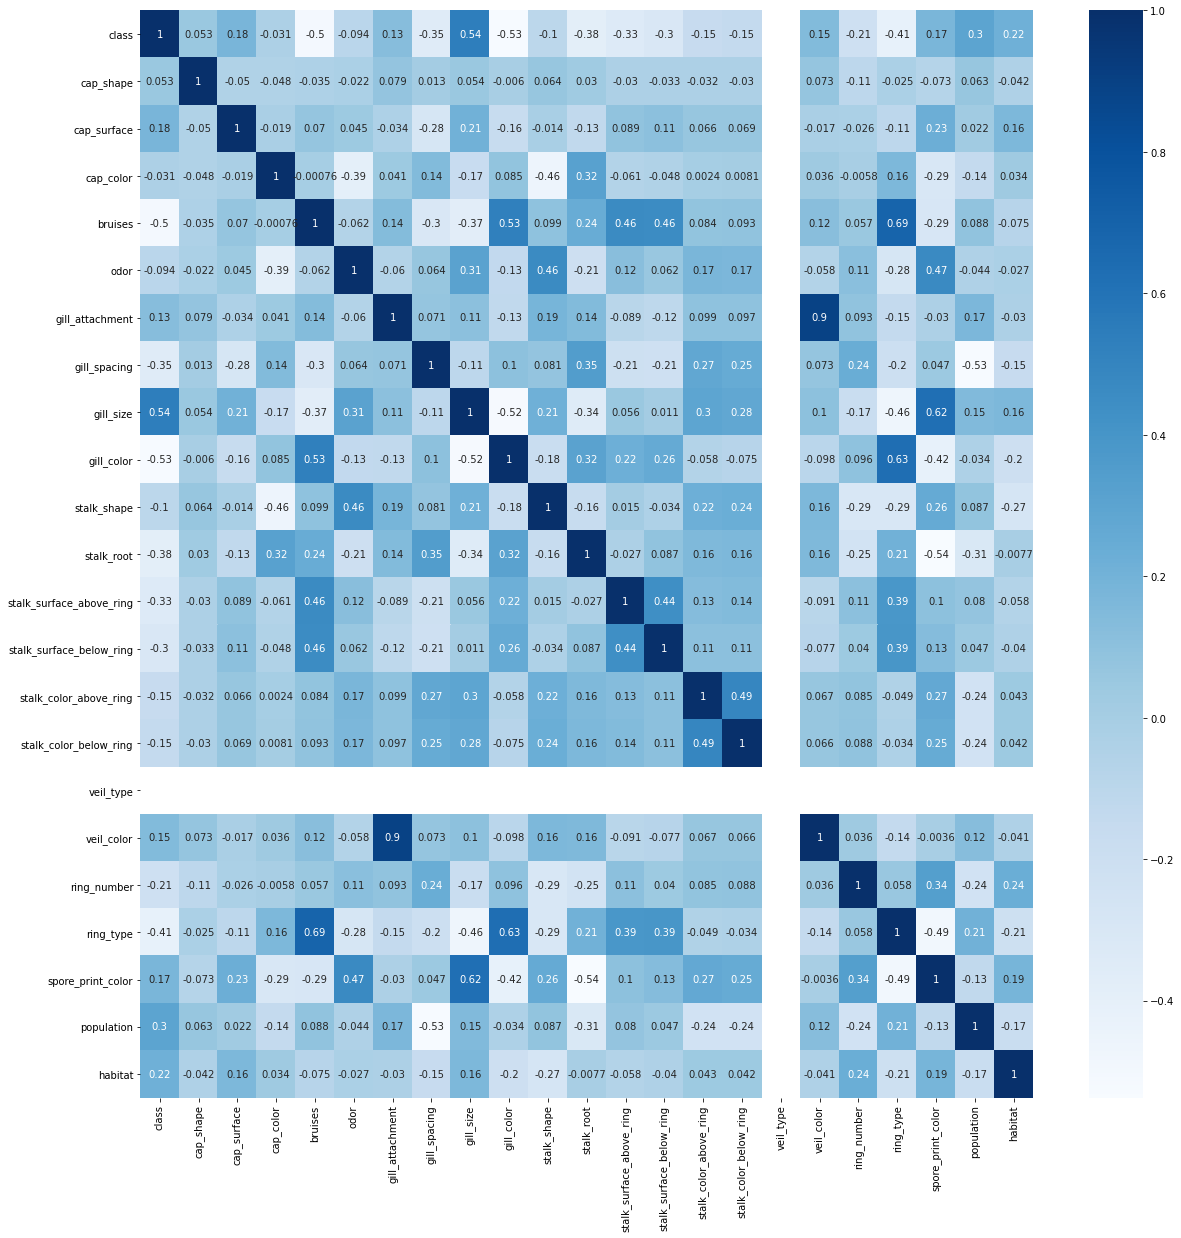

In [6]:
plt.figure(figsize = (20,20))
sns.heatmap(df_numeric.corr(), annot = True, cmap = "Blues")
plt.show()

Możemy spodziewać się zależności pomiędzy *class* i *gill_size*

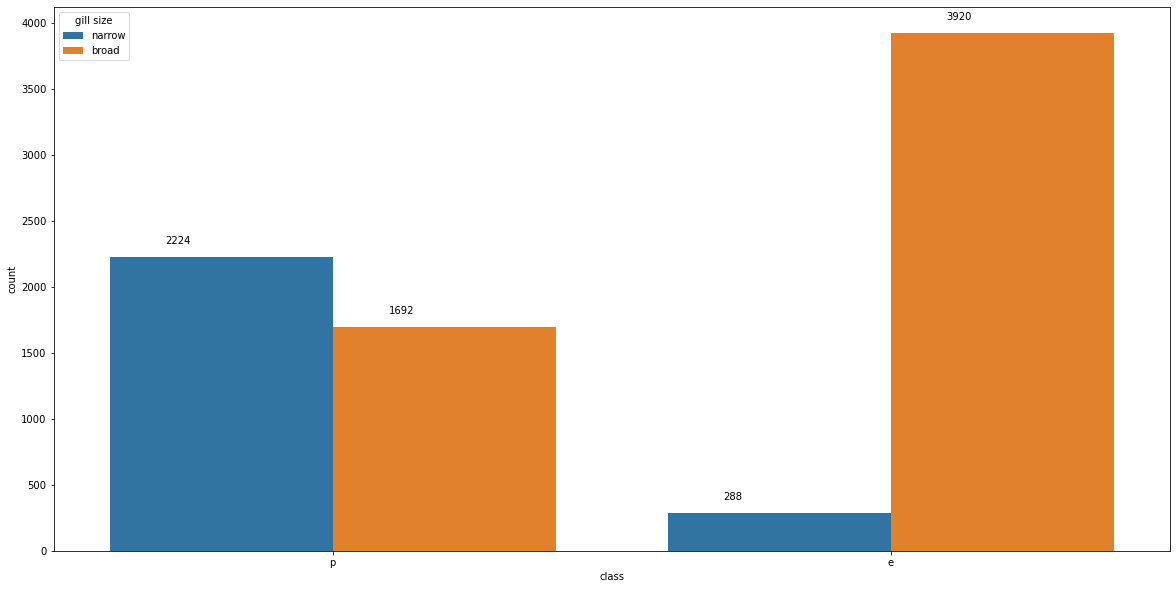

In [7]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df, x = "class", hue = "gill_size")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
        
plt.legend(title = "gill size", labels = ["narrow", "broad"])

plt.show()

## Wniosek 1.: wąskie blaszki oznaczają, że grzyb prawie na pewno jest niejadalny

Zmienna *population* również może mieć związek z jadalnością grzyba

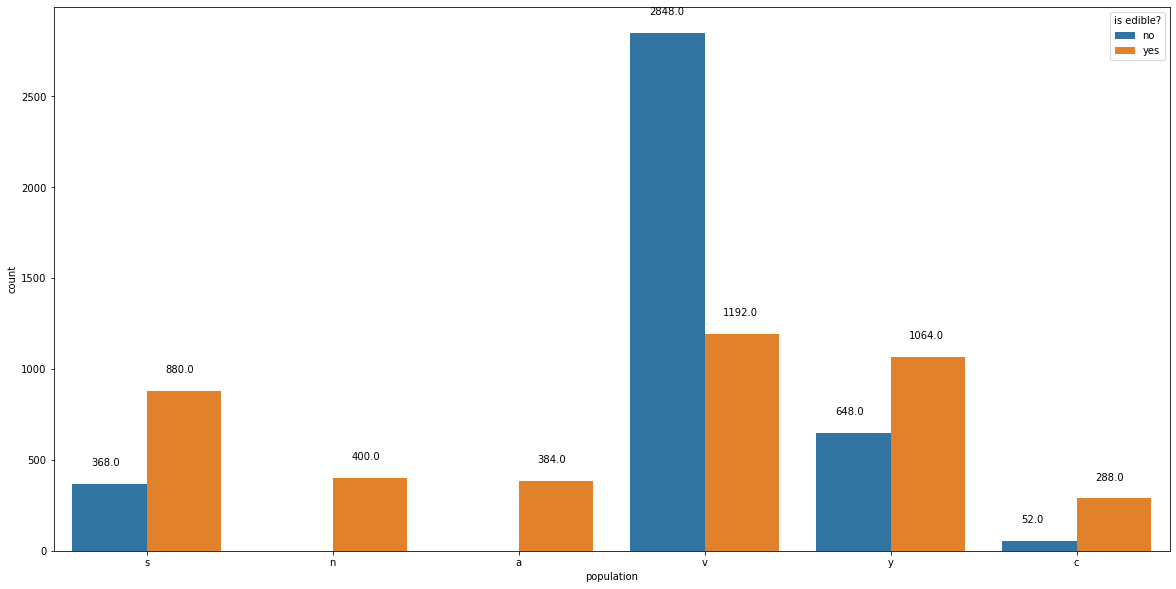

In [8]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df, x = "population", hue = "class")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
        
plt.legend(title = "is edible?", labels = ["no", "yes"])

plt.show()

Wygląda na to, że grzyby, których populacja określona została jako *numerous* i *abundant* są jadalne. Również *clustered* w większości przypadków są jadalne.

## Wniosek 2.: grzyby jadalne rosną najczęściej w większych skupiskach.
Należy tutaj mieć na uwadze, że tutaj zmienne jakościowe są w pewien sposób arbitralne i dla początkującego grzybiarza różnica pomiędzy małym a dużym skupiskiem grzybów może być niejasna.

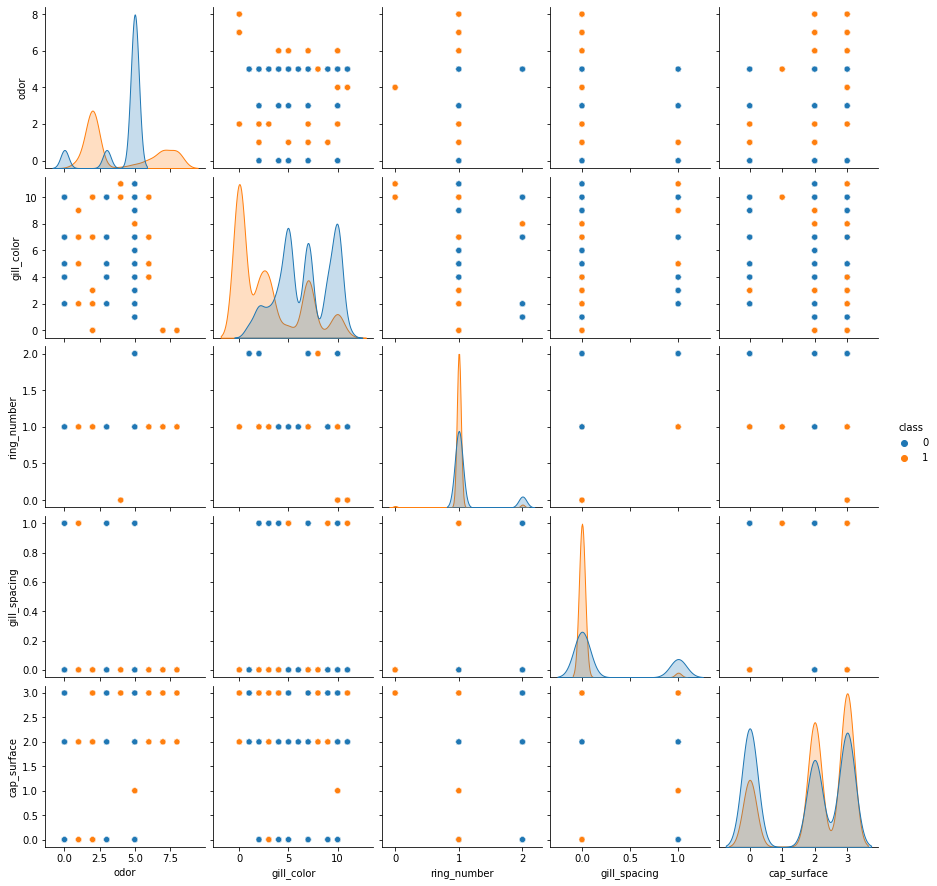

In [9]:
sns.pairplot(df_numeric[["class", "odor", "gill_color", "ring_number", "gill_spacing", "cap_surface"]], hue = "class")

Powyższy wykres niewiele mówi o faktyczny korelacjach, ponieważ zmienne nie mają porządku liniowego. Mimo to, każda pozioma lub pionowa linia o jednolitym kolorze wskazuje wartość zmiennej jakościowej, która jednoznacznie wyznacza jadalność grzyba. Uwagę zwraca *odor*, *gill color* i *gill spacing*.

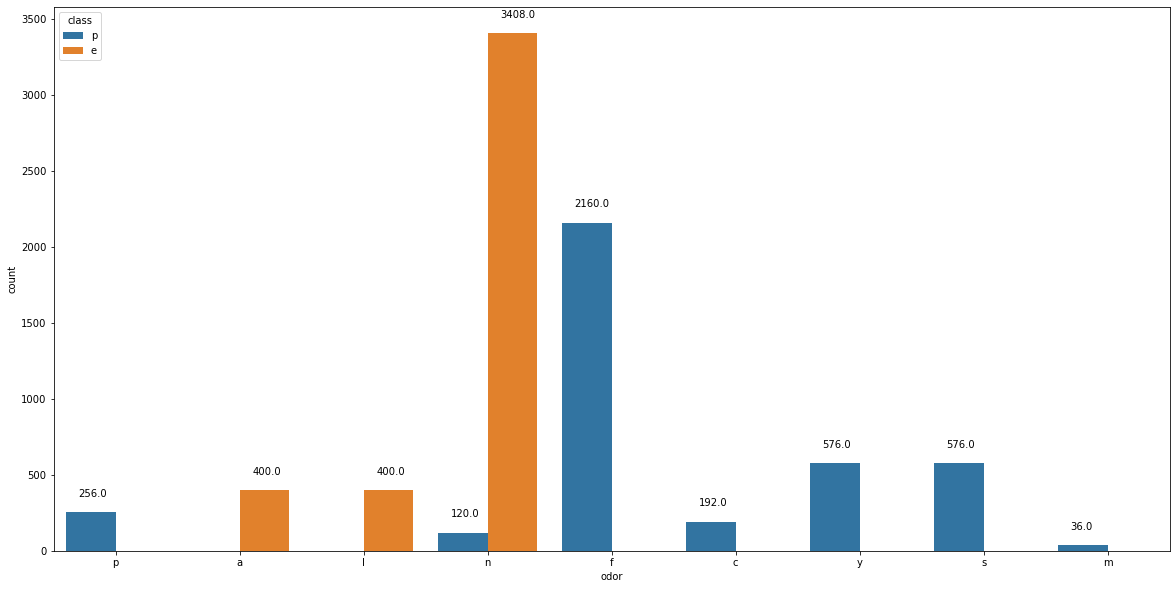

In [10]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df, x = "odor", hue = "class")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
        
plt.show()

## Wniosek 3.: zapach jest dobrym wyznacznikiem jadalności grzyba.
### Jedynie brak zapachu może zarówno oznaczać jadalnego jak i niejadalnego grzyba.

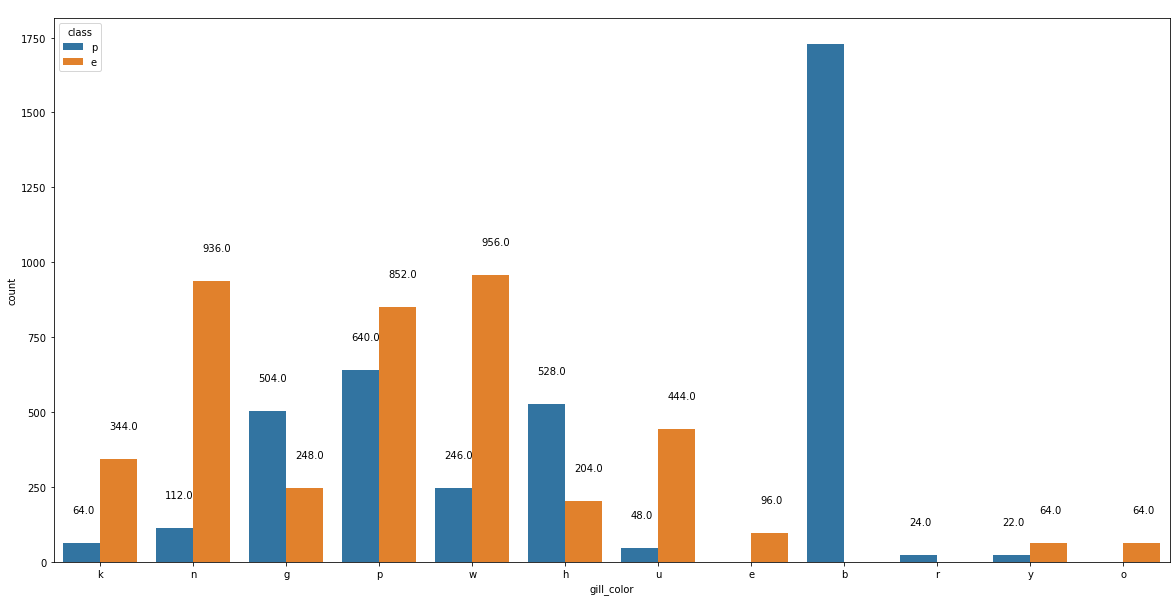

In [11]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df, x = "gill_color", hue = "class")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
        
plt.show()

## Wniosek 4.: Bladożółty kolor blaszek cechuje niejadalne grzyby.

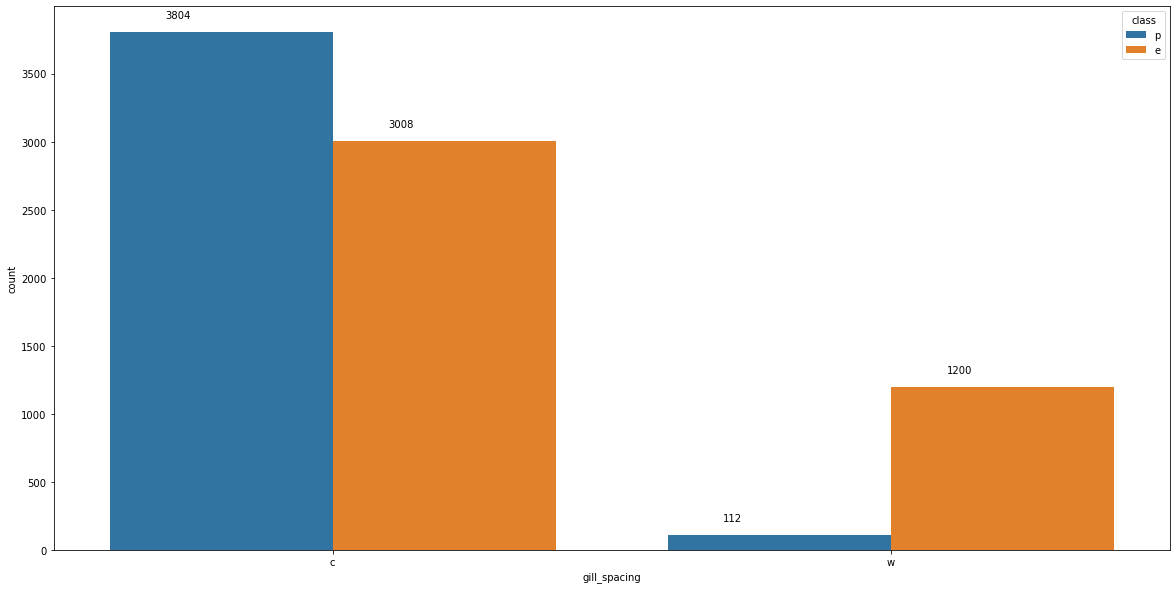

In [12]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df, x = "gill_spacing", hue = "class")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
        
plt.show()

## Wniosek 5.: grzyby o blisko położonych blaszkach są najczęściej trujące.
Jest to kolejna zmienna, która mogłaby zostać określona numerycznie (zagęszczenie blaszek). Stąd i tutaj pojawia się pewna dowolność w interpretacji, na przykład przy rozróżnianiu pomiędzy *crowded* a *close*.

# Podsumowanie 

W powyższej analizie udało się wyciągnąć kilka ogólnych wniosków na temat korelacji jadalności grzyba z jego cechami szczególnymi. Dla początkujęcgo grzybiarza cenniejsze będą wskazówki, czego powinien unikać (lepiej wiedzieć co jest niejadalne i wrócić do domu z pustym koszykiem niż nazbierać dużo grzybów ryzykując, że jest wśród nich potencjalnie kilka trujących), więc poniżej zaprezentowane jest podsumowanie wniosków na ten temat:
<br>
<table>
    <thead>
        <tr>
            <td> Czego unikać? </td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> wąskich blaszek </td>
        </tr>
        <tr>
            <td> grzybów rozsnących zdala od innych grzybów </td>
        </tr>
        <tr>
            <td> bladożółtego koloru blaszek </td>
        </tr>
        <tr>
            <td> grzybów o przykrym zapachu </td>
        </tr>
        <tr>
            <td> grzybów o blaszkach położonych blisko siebie </td>
        </tr>
    </tbody>
</table>
<br>
Prawdopodobnie są to rady, które możemy znaleźć w każdym poradniku grzybiarza (byłem tylko raz na grzybach i to bez poradnika), ale dobrze wiedzieć, że analiza eksploracyjna potwierdza te fakty. 